In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

# Imports

In [1]:
# Make modules available
import sys
sys.path.insert(1, "./modules")

# General imports
import os
import cv2
import torch
import numpy as np
import torchvision
from scipy import ndimage
from importlib import reload
from torch.utils.data import DataLoader, random_split

# Import modules
from model import *
from dataset import *
from helpers import *

# Set random seed 
torch.manual_seed(24)

# Load Dataset

In [2]:
batch_size = 1

In [3]:
# Choose device
device = "cuda:0" if torch.cuda.is_available() else "cpu"
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [4]:
# Create custom dataset
dataset_seg = SegmentationDataset('../../NimbRoNet2/Dataset/segmentation') # or define the w, 

In [5]:
print("Size of segmentation dataset ", len(dataset_seg))

Size of segmentation dataset  1192


In [6]:
# Split dataset
train_size = int(0.7 * len(dataset_seg))
test_size = int(0.15 * len(dataset_seg))
validation_size = len(dataset_seg) - (train_size + test_size)

train_seg, validation_seg, test_seg = random_split(dataset_seg, [train_size, validation_size, test_size])

In [7]:
print("Size of segmentation test set", len(test_seg))
print("Size of detection training set:", len(train_seg))
print("Size of detection validation set:", len(validation_seg))

Size of segmentation test set 178
Size of detection training set: 834
Size of detection validation set: 180


In [8]:
# Create dataloader for segmentation data
test_loader_seg = DataLoader(test_seg, batch_size=batch_size, shuffle=True)
train_loader_seg = DataLoader(train_seg, batch_size=batch_size, shuffle=True)
validation_loader_seg = DataLoader(validation_seg, batch_size=batch_size, shuffle=True)

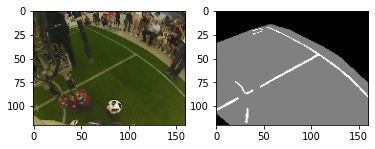

In [9]:
# Display first training image
for image, target in train_loader_seg:
    show_image_and_seg(downsample(image)[0], downsample(target)[0])
    break

# Load Trained Model

In [10]:
# Model
model = Model(device,640,480)
model = to_device(model, device)

Loaded pretrained weights for efficientnet-b0


In [11]:
model.eval()
print("Model ready for evaluation...")

Model ready for evaluation...


In [12]:
model.load_state_dict(torch.load("/home/user/shoeb/NimbRoNet2/models/model_eff_150.pt"), strict=False)

<All keys matched successfully>

# Visual Inspection

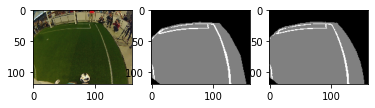

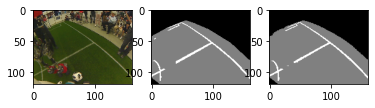

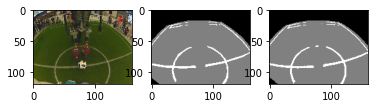

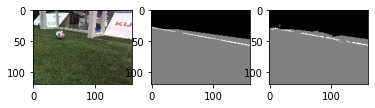

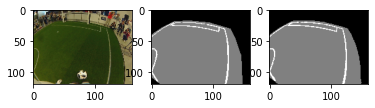

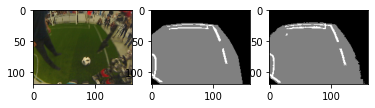

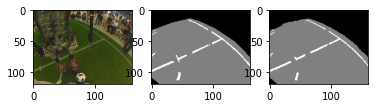

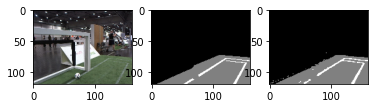

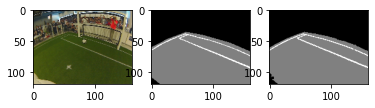

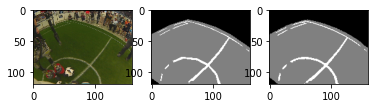

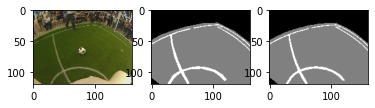

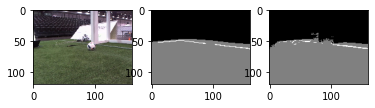

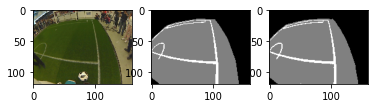

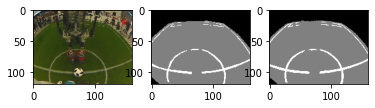

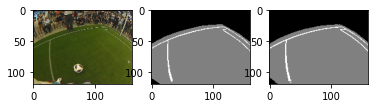

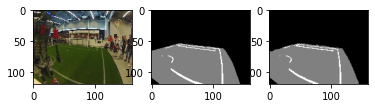

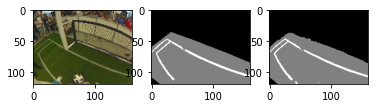

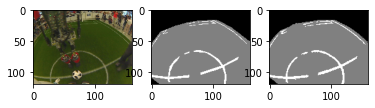

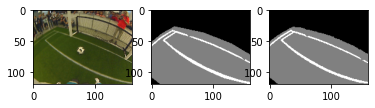

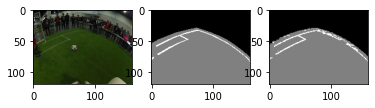

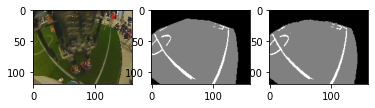

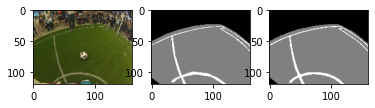

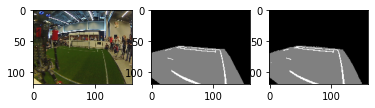

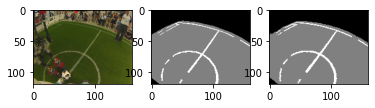

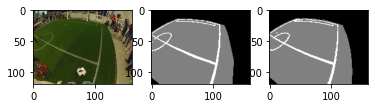

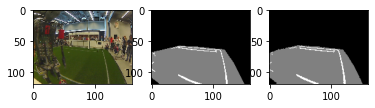

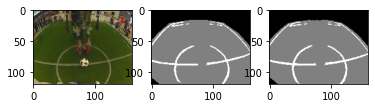

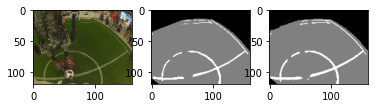

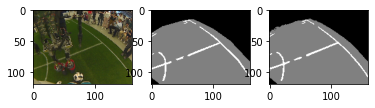

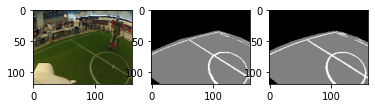

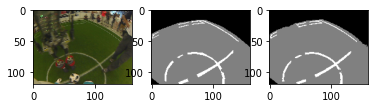

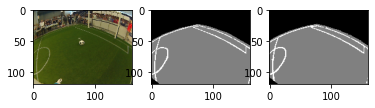

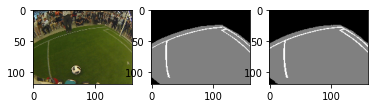

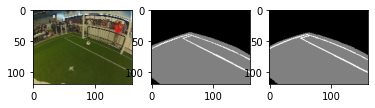

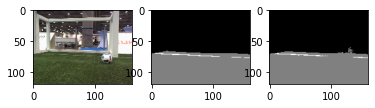

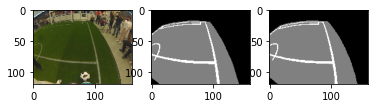

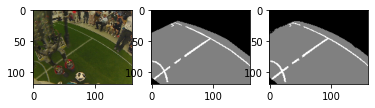

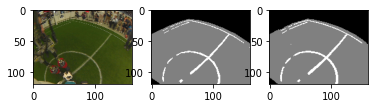

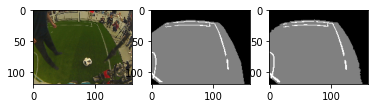

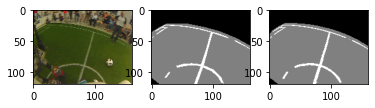

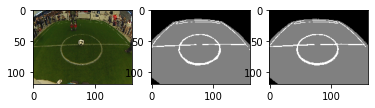

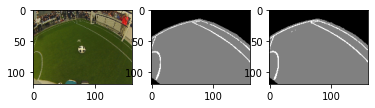

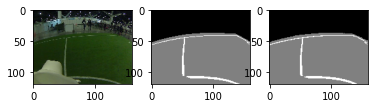

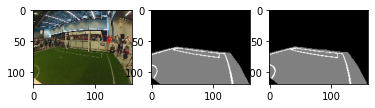

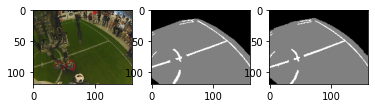

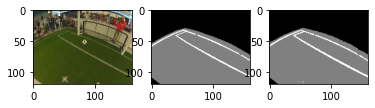

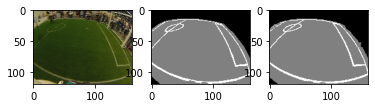

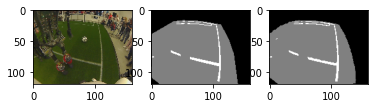

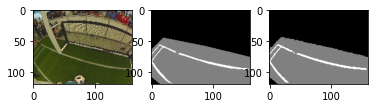

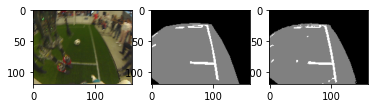

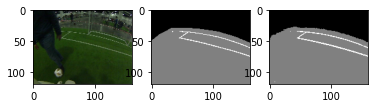

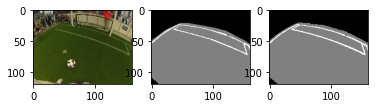

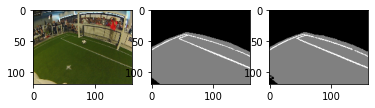

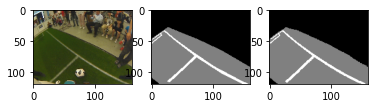

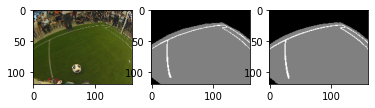

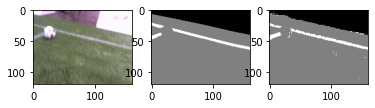

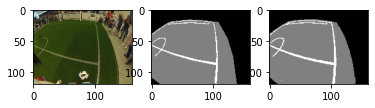

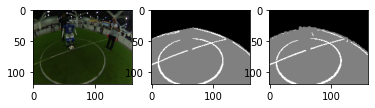

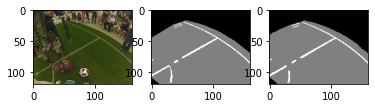

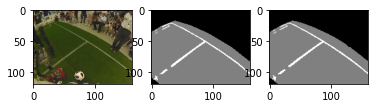

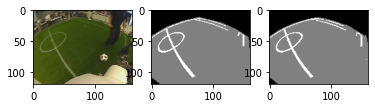

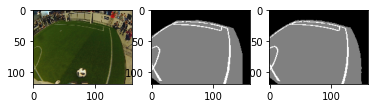

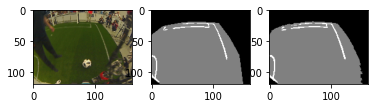

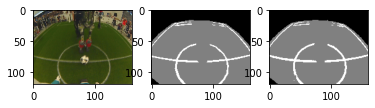

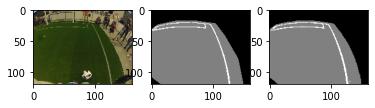

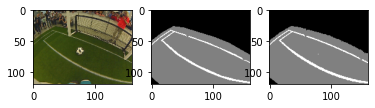

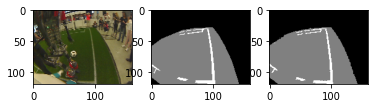

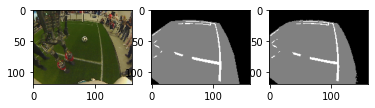

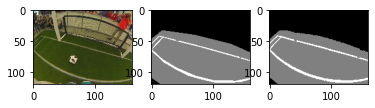

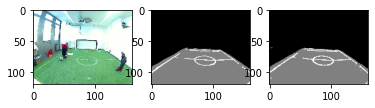

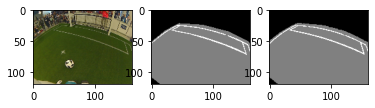

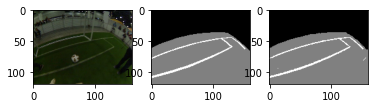

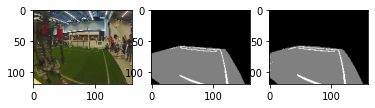

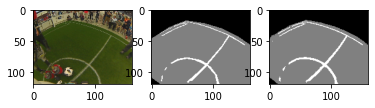

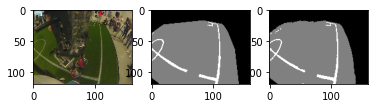

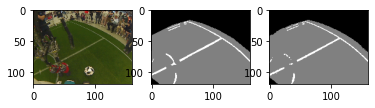

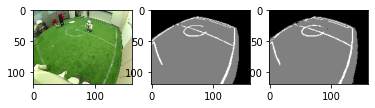

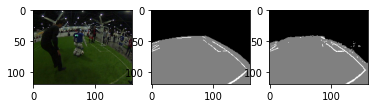

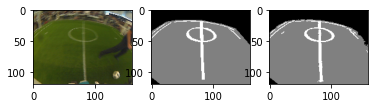

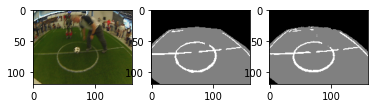

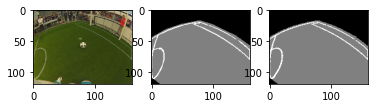

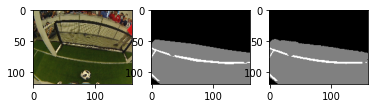

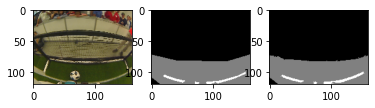

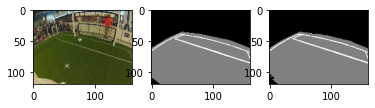

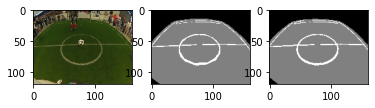

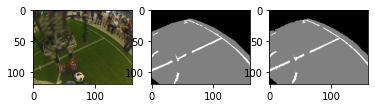

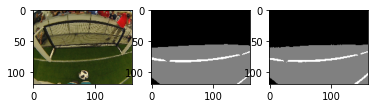

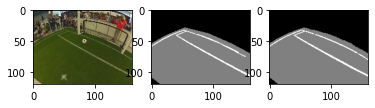

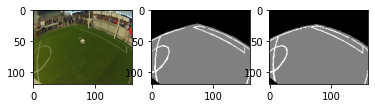

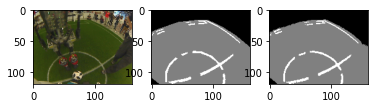

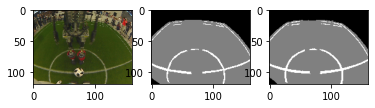

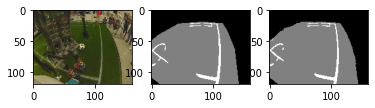

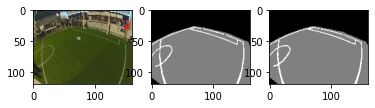

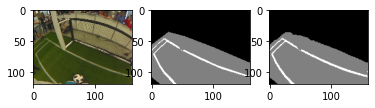

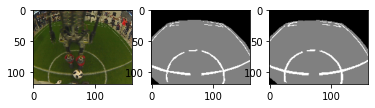

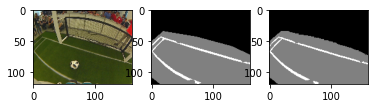

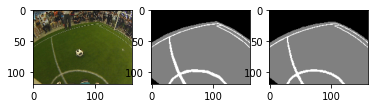

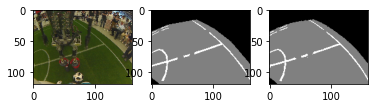

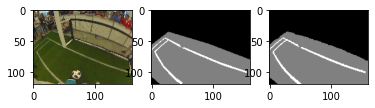

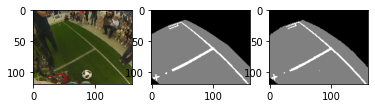

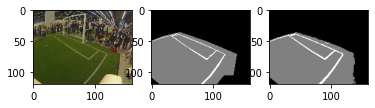

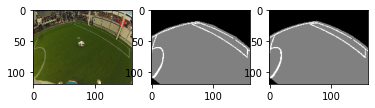

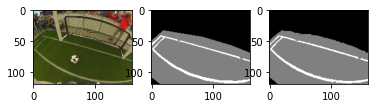

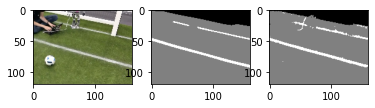

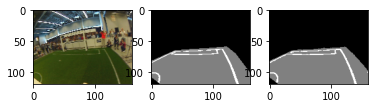

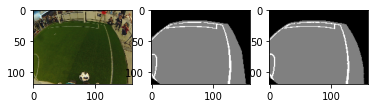

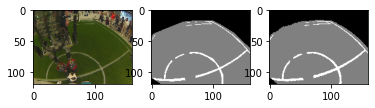

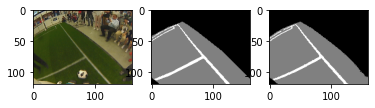

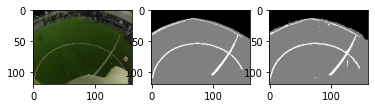

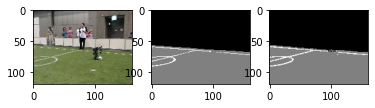

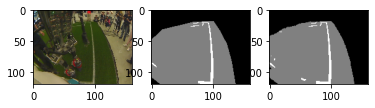

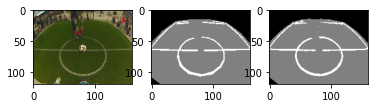

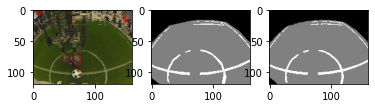

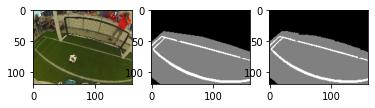

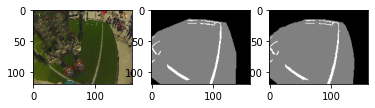

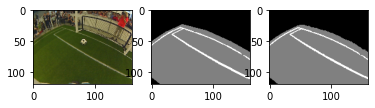

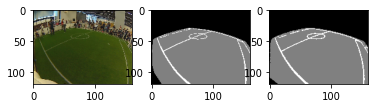

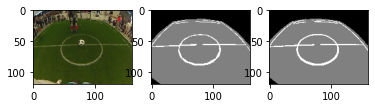

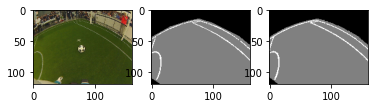

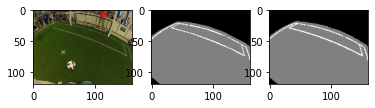

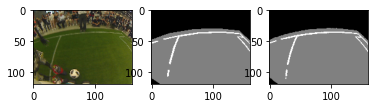

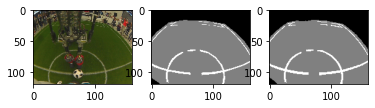

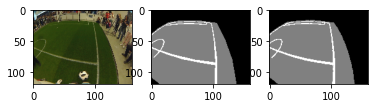

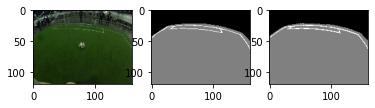

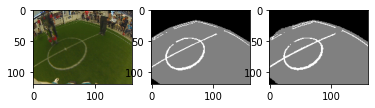

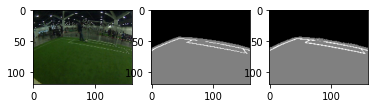

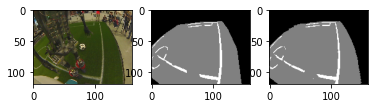

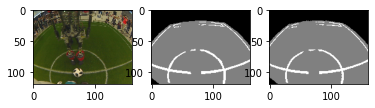

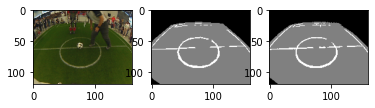

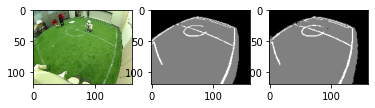

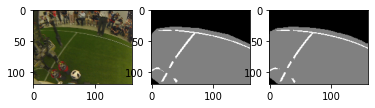

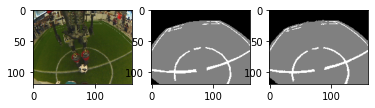

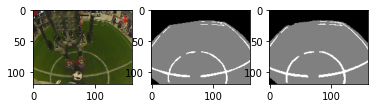

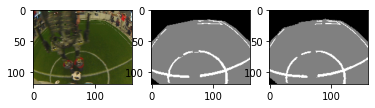

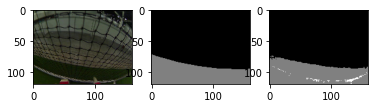

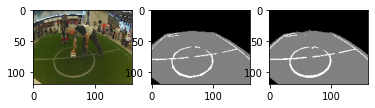

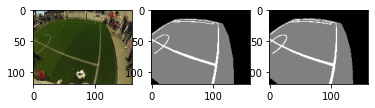

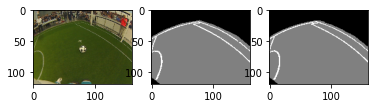

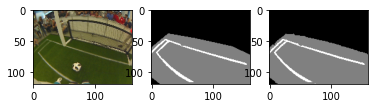

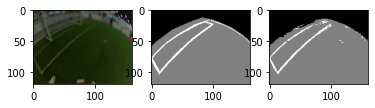

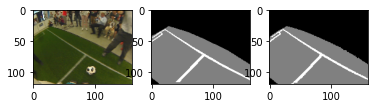

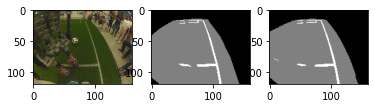

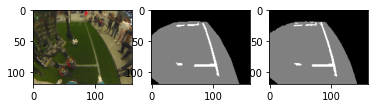

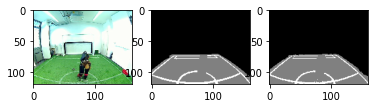

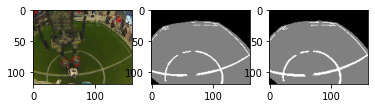

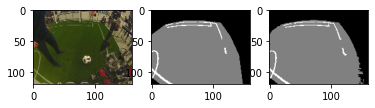

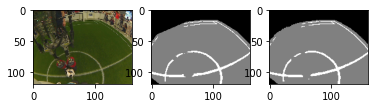

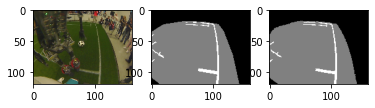

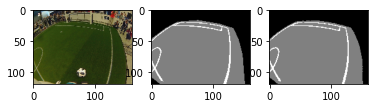

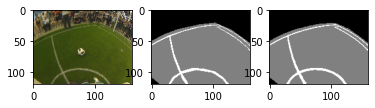

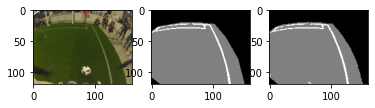

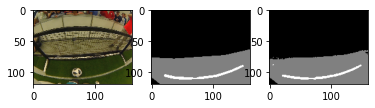

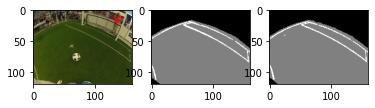

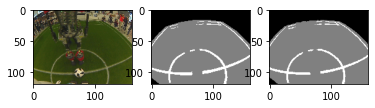

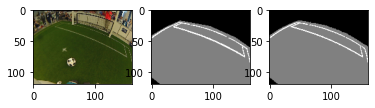

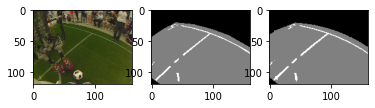

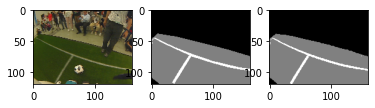

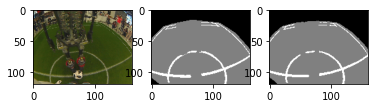

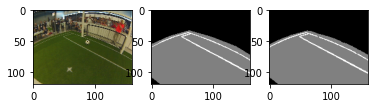

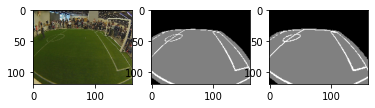

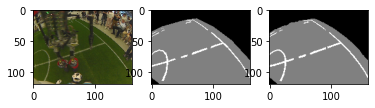

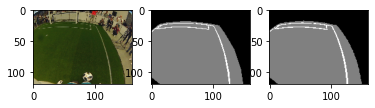

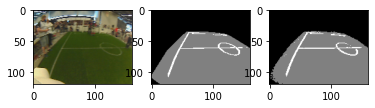

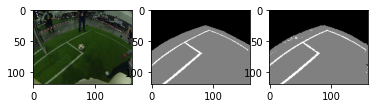

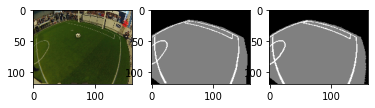

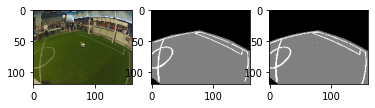

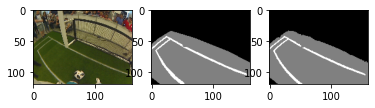

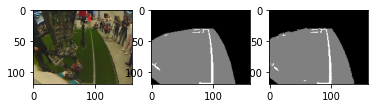

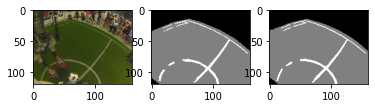

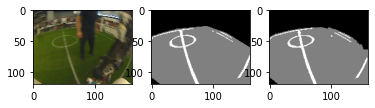

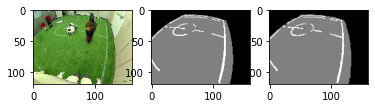

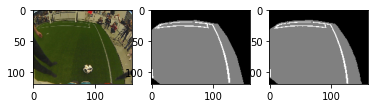

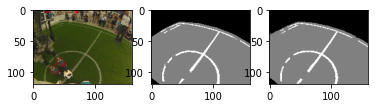

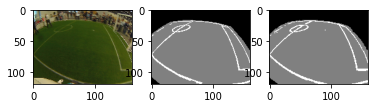

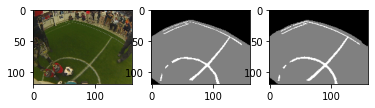

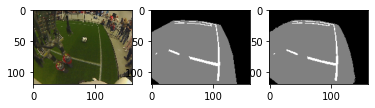

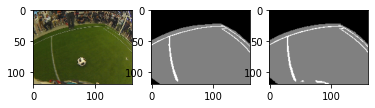

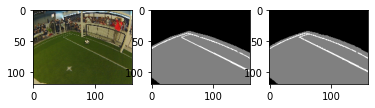

In [13]:
for image, target in test_loader_seg:    
    output,_ = model(to_device(image,device))
            
    # Get predictions from the maximum value
    _, predicted = torch.max(output, 1)
    
    predicted = predicted.detach()
    show_image_target_and_seg(downsample(image)[0],downsample(target)[0], predicted.cpu())


# Metric Evaluation

In [15]:
# ResNet-18 Backbone
accuracy,iou = model.validation_segmentation(test_loader_seg)

Accuracy {'Field': 98.95608359736721, 'Lines': 92.08745124038299, 'Background': 98.78378649490985, 'Total': 98.63758192883894}
IOU {'Field': 0.9785220166299334, 'Lines': 0.8155359690864528, 'Background': 0.9829941774674588, 'Total': 0.925684054394615}


In [15]:
# EfficientNet-B0 Backbone
accuracy,iou = model.validation_segmentation(test_loader_seg)

Accuracy {'Field': 98.82215596405248, 'Lines': 87.97699625341124, 'Background': 97.45548560876533, 'Total': 97.95207162921349}
IOU {'Field': 0.9682768528961618, 'Lines': 0.7935940585797335, 'Background': 0.9646311023543866, 'Total': 0.9088340046100939}
